In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pylab
from numpy import arange
import math
import seaborn as sns
import scipy.stats
from scipy import signal 
import time

In [76]:
class Padroes:
    def __init__(self,M):
        self.matriz = np.array(M)
        self.symbols = []
        self.padroes_gerados = []
    def deterministic(self, inter):
        self.symbols = [0,1]
        k = 0
        for i in range(inter):
            p = 0
            r = np.random.random_sample()
            for j in range(len(self.matriz)):
                p = p + self.matriz[k][j]
                if r < p:
                    self.padroes_gerados.append(self.symbols[k])
                    k = j
                    break
                else: continue
        return self.padroes_gerados
    
inicio = time.time()

fig6a = Padroes([[0.9,0.1],[0.9,0.1]])
fig6b = Padroes([[0.2,0.8],[0.2,0.8]])
fig6c = Padroes([[0.5,0.5],[0.5,0.5]])

padroes_fig6a = fig6a.deterministic(200)
padroes_fig6b = fig6b.deterministic(200)
padroes_fig6c = fig6c.deterministic(200)


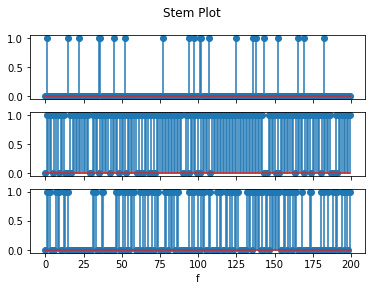

In [77]:
marks = np.arange(len(padroes_fig6a))

fig, (x1, x2, x3) = plt.subplots(3, sharex = True, sharey = True)

x1.stem(marks, padroes_fig6a)
x2.stem(marks, padroes_fig6b)
x3.stem(marks, padroes_fig6c)

plt.suptitle('Stem Plot')
plt.xlabel('f')

plt.show()

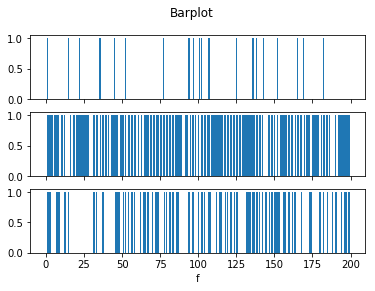

In [78]:

fig, (x1, x2, x3) = plt.subplots(3, sharex = True, sharey = True)

x = np.arange(len(padroes_fig6a))
x1.bar(x, padroes_fig6a)
x2.bar(x, padroes_fig6b)
x3.bar(x, padroes_fig6c)

plt.suptitle('Barplot')
plt.xlabel('f')
#pylab.xlim(0,inter+1)
#pylab.ylim(0,1)

plt.show()

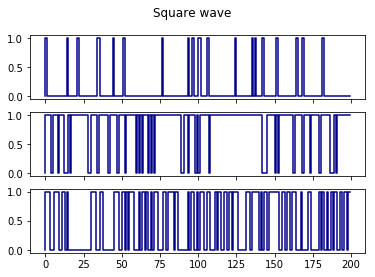

In [79]:

fig, (x1, x2, x3) = plt.subplots(3, sharex = True, sharey = True)

plt.suptitle("Square wave")
x1.step(arange(0,len(padroes_fig6a)),padroes_fig6a, color = 'darkblue')
x2.step(arange(0,len(padroes_fig6b)),padroes_fig6b, color = 'darkblue')
x3.step(arange(0,len(padroes_fig6c)),padroes_fig6c, color = 'darkblue')
#plt.xlim(0,len(hl))

plt.show()

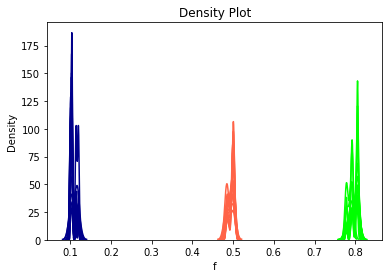

In [80]:
def freq(automato, symbol):
    automato = np.array(automato)
    c = 0
    for i in automato: 
        if i==symbol: 
            c +=1
    return c/len(automato)

freq_fig6a = []
freq_fig6b = []
freq_fig6c = []

for i in range(200,2000,100):
    freq_fig6a.append(freq(fig6a.deterministic(i),1))
    freq_fig6b.append(freq(fig6b.deterministic(i),1))
    freq_fig6c.append(freq(fig6c.deterministic(i),1))
    sns.distplot(freq_fig6a, hist = False, kde = True, color = 'darkblue')
    sns.distplot(freq_fig6b, hist = False, kde = True, color = 'lime')
    sns.distplot(freq_fig6c, hist = False, kde = True, color = 'tomato')
    
plt.title('Density Plot')
plt.xlabel('f')
plt.ylabel('Density')
plt.show()

#fim = time.time()
#print(fim-inicio)

In [81]:
#media = np.mean(hl)
#desvio = np.std(hl)

#def probability_density(x):
 #   pdf = (1/(desvio*math.sqrt(2*math.pi)))*math.exp((-1/2)*((x-media)/desvio)**2)
  #  return pdf

#k = []
#p = []
#for i in range(len(hl)):
#    pdf = (1/(desvio*math.sqrt(2*math.pi)))*math.exp((-1/2)*((hl[i]-media)/desvio)**2)
#    k.append(pdf)
#    p.append(i)
    
#plt.plot(k)


#for i in range(inter + 1):
    #k.append(probability_density(hl[i]))
    #p.append(i)
    #plt.plot(i,probability_density(hl[i]))
#print(k)
#plt.plot(k,probability_density())
#plt.xlim(0,1)
#plt.show()